In [2]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('education_career_success.csv')

print("Dataset loaded successfully. Preview:")

print(df.head())

Dataset loaded successfully. Preview:
  Student_ID   Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001  24.0    Male             3.58       1052                 291   
1     S00002  21.0   Other             2.52       1211                 112   
2     S00003  28.0  Female             3.42       1193                 715   
3     S00004  25.0    Male             2.43       1497                 170   
4     S00005  22.0    Male             2.08       1012                 599   

   University_GPA    Field_of_Study  Internships_Completed  \
0            3.96              Arts                    3.0   
1            3.63               Law                    4.0   
2            2.63          Medicine                    4.0   
3            2.81  Computer Science                    3.0   
4            2.48       Engineering                    4.0   

   Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  \
0                 7.0             2.0     

In [4]:
print("Missing values in each column:")

print(df.isnull().sum())

Missing values in each column:
Student_ID                0
Age                      15
Gender                    0
High_School_GPA           1
SAT_Score                 0
University_Ranking        0
University_GPA            0
Field_of_Study            0
Internships_Completed     4
Projects_Completed        5
Certifications            8
Soft_Skills_Score         5
Networking_Score          2
Job_Offers                2
Starting_Salary           8
Career_Satisfaction       0
Years_to_Promotion        0
Current_Job_Level         0
Work_Life_Balance         1
Entrepreneurship          0
dtype: int64


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:

  mean_value = df[col].mean()

  df[col] = df[col].fillna(mean_value)

print("Missing values replaced with mean. Updated missing values:")

print(df.isnull().sum())

Missing values replaced with mean. Updated missing values:
Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64


In [6]:
Q1_salary = df['Starting_Salary'].quantile(0.25)

Q3_salary = df['Starting_Salary'].quantile(0.75)

IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 1.5 * IQR_salary

upper_bound_salary = Q3_salary + 1.5 * IQR_salary



outliers_salary = df[(df['Starting_Salary'] < lower_bound_salary) | (df['Starting_Salary'] > upper_bound_salary)]['Starting_Salary']

print("Outliers in Starting_Salary:")

print(outliers_salary)

Outliers in Starting_Salary:
16       97500.0
128      96700.0
1284     92400.0
1340     96900.0
1809    101000.0
2496     91000.0
2541     92500.0
3434     94400.0
3503     98200.0
3830     98900.0
4145     93000.0
4538    100600.0
Name: Starting_Salary, dtype: float64


In [7]:
Q1_salary = df['Starting_Salary'].quantile(0.25)

Q3_salary = df['Starting_Salary'].quantile(0.75)

IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 1.5 * IQR_salary

upper_bound_salary = Q3_salary + 1.5 * IQR_salary



df_cleaned = df[(df['Starting_Salary'] >= lower_bound_salary) & (df['Starting_Salary'] <= upper_bound_salary)].copy()

print("Outliers dropped. New dataset shape:", df_cleaned.shape)



Outliers dropped. New dataset shape: (4988, 20)


In [8]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns

le = LabelEncoder()

for col in categorical_cols:

  df_cleaned.loc[:, col] = le.fit_transform(df_cleaned[col].astype(str))

print("Label Encoding completed. Dataset preview:")

print(df_cleaned.head())

Label Encoding completed. Dataset preview:
  Student_ID   Age Gender  High_School_GPA  SAT_Score  University_Ranking  \
0          0  24.0      1             3.58       1052                 291   
1          1  21.0      2             2.52       1211                 112   
2          2  28.0      0             3.42       1193                 715   
3          3  25.0      1             2.43       1497                 170   
4          4  22.0      1             2.08       1012                 599   

   University_GPA Field_of_Study  Internships_Completed  Projects_Completed  \
0            3.96              0                    3.0                 7.0   
1            3.63              4                    4.0                 7.0   
2            2.63              6                    4.0                 8.0   
3            2.81              2                    3.0                 9.0   
4            2.48              3                    4.0                 6.0   

   Certifications  

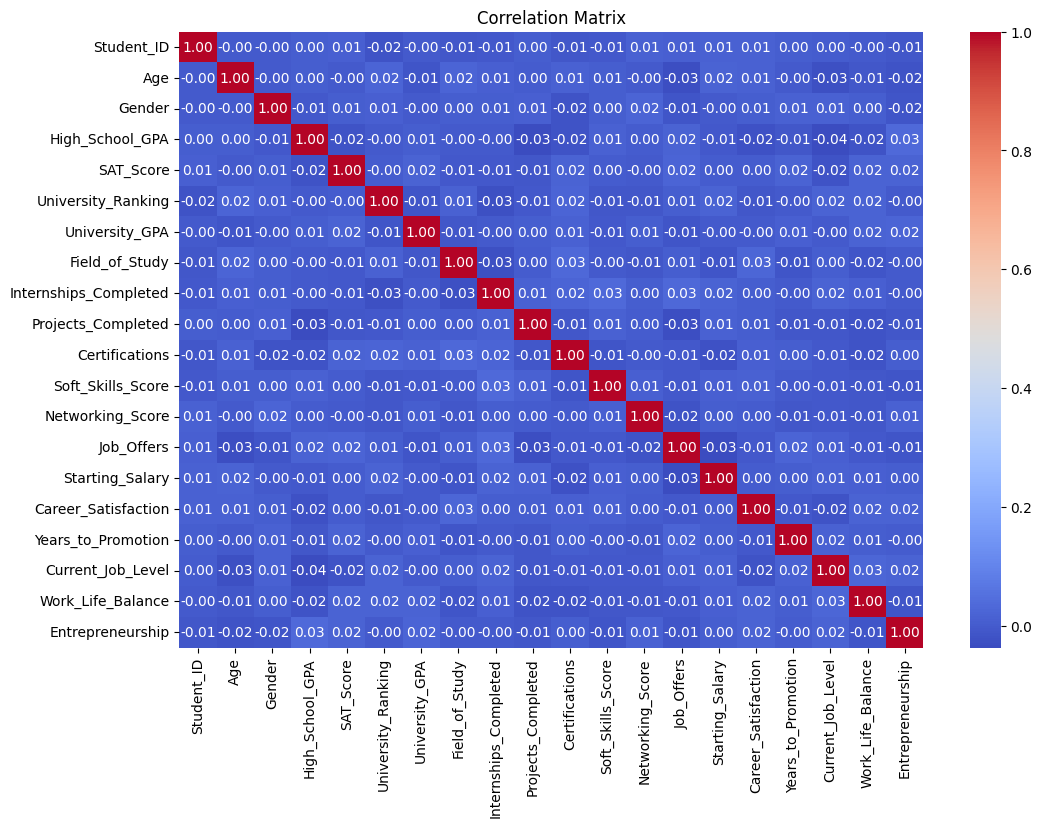

In [9]:
plt.figure(figsize=(12, 8))

sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')

plt.show()

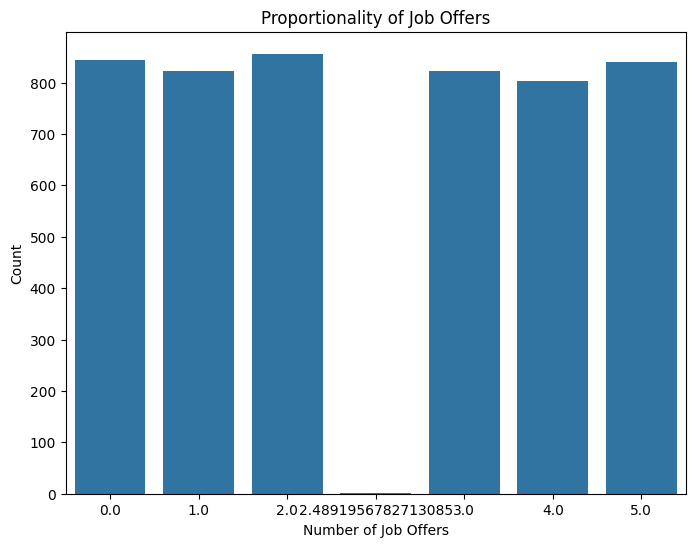

In [10]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Job_Offers', data=df_cleaned)

plt.title('Proportionality of Job Offers')

plt.xlabel('Number of Job Offers')

plt.ylabel('Count')

plt.show()

In [11]:
X = df_cleaned.drop(columns=['Student_ID', 'Starting_Salary'])

y = df_cleaned['Starting_Salary']

print("Independent features (X) shape:", X.shape)

print("Target variable (y) shape:", y.shape)



Independent features (X) shape: (4988, 18)
Target variable (y) shape: (4988,)


In [12]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Features standardized. First few rows of X_scaled:")

print(X_scaled[:5])



Features standardized. First few rows of X_scaled:
[[ 0.1605502   0.76108551  1.01355077 -0.99348535 -0.62589915  1.63315316
  -1.4864562   0.7239652   0.85004579 -0.30096637  1.21104952  0.86342394
   1.46831411 -0.54859447  1.40092477 -0.94954387  0.52532787 -0.50200402]
 [-0.70445552  2.52352493 -0.82868015 -0.21086311 -1.13992194  1.0602386
   0.5037313   1.43466935  0.85004579  0.28680109  0.85997308 -1.59278415
   0.88356855 -1.59301784 -1.42214876  0.73958767  0.52532787 -0.50200402]
 [ 1.31389115 -1.00135391  0.73547818 -0.29946186  0.59167441 -0.67586613
   1.49882505  1.43466935  1.1983832  -0.88873382 -1.59756198  1.21431081
  -1.45541369  1.19211114 -0.01061199 -0.94954387  0.52532787 -0.50200402]
 [ 0.44888543  0.76108551 -0.98509599  1.19687247 -0.97336707 -0.36336728
  -0.49136245  0.7239652   1.5467206  -0.88873382  1.56212596  0.1616502
  -0.87066813  0.4958289   1.40092477  0.73958767 -0.16838566 -0.50200402]
 [-0.41612028  0.76108551 -1.59337978 -1.19037144  0.258564

Mean Squared Error: 203551232.71155536
R² Score: -0.004346934271303837


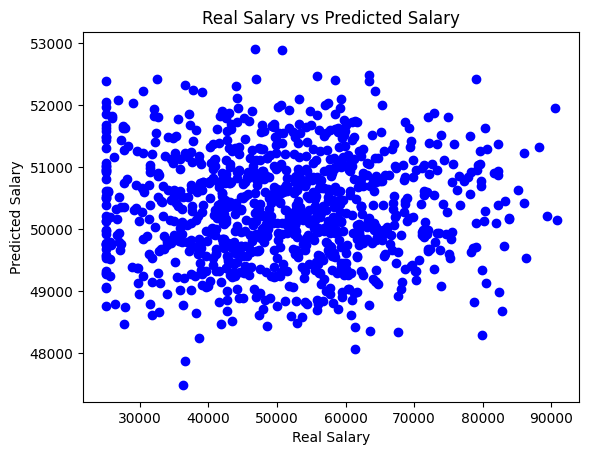

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)



from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)



y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="blue") # Dots for real vs predicted

plt.title("Real Salary vs Predicted Salary")

plt.xlabel("Real Salary")

plt.ylabel("Predicted Salary")

plt.show()
